# ML Challenge (Optional)

Train, test, optimize, and analyze the performance of a classification model using a methodology of your choice for the randomly generated moons dataset.

You are not being evaluated for the performance of your model. Instead, we are interested in whether you can implement a simple but rigorous ML workflow.

Show all of your work in this notebook.

In [109]:
import numpy as np
import pandas as pd
## sklearn models
from sklearn.base import BaseEstimator
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.linear_model import Ridge, Lasso, LassoLars, ElasticNet
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import ExtraTreesClassifier, ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVR, SVC
from sklearn.pipeline import Pipeline
from datetime import date

## sklearn model selection
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance

## sklearn model metrics
from sklearn import metrics

import itertools
import gc
import statistics
import math
import seaborn as sns

## Dataset

In [110]:
# DO NOT MODIFY
from sklearn.datasets import make_moons

X, Y = make_moons(random_state=42, n_samples=(50, 450), noise=0.25)

## Training

In [111]:
df = pd.DataFrame(X)
df

,0,1
0,1.569404,-0.133388
1,0.496307,0.443235
2,1.783240,-0.230247
3,0.551058,-0.037493
4,0.257809,0.583334
...,...,...
495,0.118067,0.181018
496,1.170904,-0.826999
497,1.084024,0.024586
498,1.542110,-0.238542


In [112]:
X.shape, Y.shape

((500, 2), (500,))

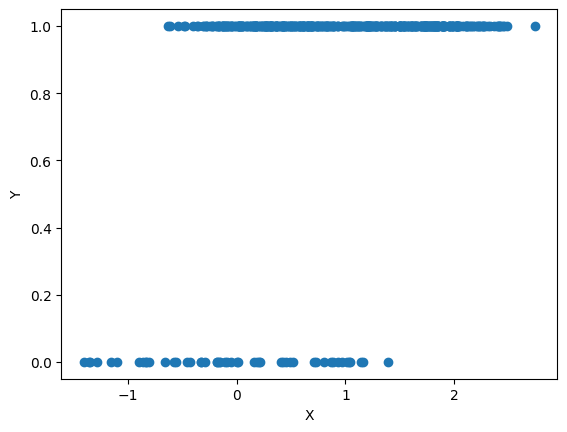

In [113]:
plt.scatter(df[0], Y)
plt.xlabel('X') # set the labels of the x and y axes
plt.ylabel('Y')
plt.show()

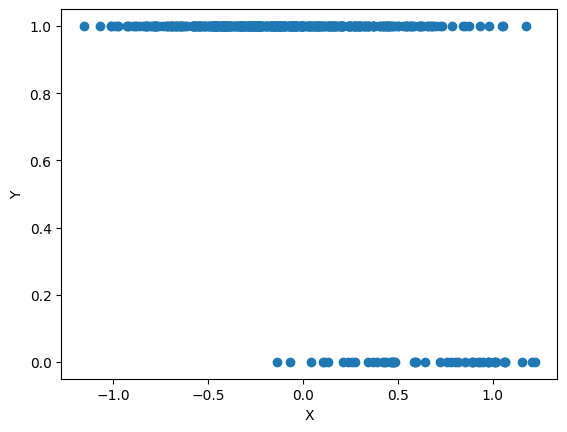

In [114]:
plt.scatter(df[1], Y)
plt.xlabel('X') # set the labels of the x and y axes
plt.ylabel('Y')
plt.show()

In [115]:
df.isna().sum()

0    0
1    0
dtype: int64

In [116]:
df.dropna()

,0,1
0,1.569404,-0.133388
1,0.496307,0.443235
2,1.783240,-0.230247
3,0.551058,-0.037493
4,0.257809,0.583334
...,...,...
495,0.118067,0.181018
496,1.170904,-0.826999
497,1.084024,0.024586
498,1.542110,-0.238542


In [124]:
df_y = pd.DataFrame(Y)
df_y[0].value_counts()

0
1    450
0     50
Name: count, dtype: int64

## Testing / Optimization

In [119]:
Y.shape

(500,)

In [120]:
def train_cv(X, y, param):
    X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=.3, random_state=420)
    lr = LogisticRegression(solver='lbfgs',max_iter=1000,penalty='l2', C=param['C'],\
                                    tol=1e-5, class_weight='balanced',random_state=param['random_state'])
    lr.fit(X_train, y_train)
    
    y_pred = lr.predict(X_valid)

    return fun_binary_metrics(y_valid, p_pred = y_pred)

In [26]:
C_range = np.logspace(-2, 3, 6)

In [102]:
def tune(X, y, task):
    res = dict()
    if task == 'lr':
        for C in C_range:    
            params = {'random_state': 50, 'kfold': 3, 'task': task, 'C': C, 'max_iter': 1000}
            print(params)
            cv_score = train_cv(X, y, param=params)
            res[C] = cv_score

    # use accuracy to choose hyperparameter (pairs)
    res = pd.DataFrame.from_dict(res, orient='index')
    best_params = res.iloc[:, 0].idxmax()

    return best_params, res

In [121]:
tune(X,Y, 'lr')

{'random_state': 50, 'kfold': 3, 'task': 'lr', 'C': 0.01, 'max_iter': 1000}
balanced accuracy accuracy auc sensitivity specificity best prob cut
{'random_state': 50, 'kfold': 3, 'task': 'lr', 'C': 0.1, 'max_iter': 1000}
balanced accuracy accuracy auc sensitivity specificity best prob cut
{'random_state': 50, 'kfold': 3, 'task': 'lr', 'C': 1.0, 'max_iter': 1000}
balanced accuracy accuracy auc sensitivity specificity best prob cut
{'random_state': 50, 'kfold': 3, 'task': 'lr', 'C': 10.0, 'max_iter': 1000}
balanced accuracy accuracy auc sensitivity specificity best prob cut
{'random_state': 50, 'kfold': 3, 'task': 'lr', 'C': 100.0, 'max_iter': 1000}
balanced accuracy accuracy auc sensitivity specificity best prob cut
{'random_state': 50, 'kfold': 3, 'task': 'lr', 'C': 1000.0, 'max_iter': 1000}
balanced accuracy accuracy auc sensitivity specificity best prob cut


(0.01,
            0         1         2         3         4    5
 0.01     0.5  0.113333  0.869748  0.857143  0.882353  1.0
 0.10     0.5  0.113333  0.881026  0.879699  0.882353  1.0
 1.00     0.5  0.113333  0.914197  0.887218  0.941176  1.0
 10.00    0.5  0.113333  0.910438  0.879699  0.941176  1.0
 100.00   0.5  0.113333  0.914197  0.887218  0.941176  1.0
 1000.00  0.5  0.113333  0.914197  0.887218  0.941176  1.0)

In [ ]:
param = {'random_state': 50, 'kfold': 3, 'task': 'lr', 'C': 100, 'max_iter': 1000}

X_train, X_valid, y_train, y_valid = train_test_split(X, Y, test_size=.3, random_state=420)
lr = LogisticRegression(solver='lbfgs',max_iter=1000,penalty='l2', C=param['C'],\
                                tol=1e-5, class_weight='balanced',random_state=param['random_state'])
lr.fit(X_train, y_train)

y_pred = lr.predict(X_valid)

## Performance Analysis

In [20]:
def fun_binary_metrics(y_true, y_pred=None, p_pred=None): # my own function from another project
    if p_pred is not None:
        fpr, tpr, thresholds = metrics.roc_curve(y_true, p_pred, pos_label=1)
        youden = 1 - fpr + tpr
        m = max(youden)
        pos = [i for i, j in enumerate(youden) if j == m]
        best_prob_cut = thresholds[pos]

        y_pred = p_pred>best_prob_cut[0]
        y_pred = y_pred.astype(int)
        y_pred
        accuracy = metrics.accuracy_score(y_true, y_pred)
        bal_accuracy = metrics.balanced_accuracy_score(y_true, y_pred)
        
        sensitivity = tpr[pos][0]
        specifisity = 1-fpr[pos][0]
        
        auc = metrics.roc_auc_score(y_true, p_pred) 
        print('balanced accuracy','accuracy', 'auc', 'sensitivity', 'specificity','best prob cut')
        return bal_accuracy, accuracy, auc, sensitivity, specifisity, best_prob_cut[0]
    
    elif p_pred is None:
        accuracy = metrics.accuracy_score(y_true, y_pred)
        bal_accuracy = metrics.balanced_accuracy_score(y_true, y_pred)
        auc = metrics.roc_auc_score(y_true, y_pred)
        
        tn, fp, fn, tp = metrics.confusion_matrix(y_true, y_pred).ravel()
        
        sensitivity = tp/(tp+fn)
        specifisity = tn/(tn+fp)
        
        print('balanced accuracy','accuracy', 'auc', 'sensitivity', 'specificity','best prob cut')
        return bal_accuracy, accuracy, auc, sensitivity, specifisity, 0.5 
    

In [125]:
param = {'random_state': 50, 'kfold': 3, 'task': 'lr', 'C': 100, 'max_iter': 1000}

X_train, X_valid, y_train, y_valid = train_test_split(X, Y, test_size=.3, random_state=420)

lr = LogisticRegression(solver='lbfgs',max_iter=1000,penalty='l2', C=param['C'],\
                                tol=1e-5, class_weight='balanced',random_state=param['random_state'])
lr.fit(X_train, y_train)

y_pred = lr.predict(X_valid)

In [96]:
def confusion_matrix(y_valid, y_pred):
    cnf_matrix = metrics.confusion_matrix(y_valid, y_pred)

    # Visualizing the Confusion Matrix
    class_names = [0,1] # Our diagnosis categories
    
    fig, ax = plt.subplots()
    # Setting up and visualizing the plot (do not worry about the code below!)
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)
    sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g') # Creating heatmap
    ax.xaxis.set_label_position("top")
    plt.tight_layout()
    plt.title('Confusion matrix', y = 1.1)
    plt.ylabel('Actual diagnosis')
    plt.xlabel('Predicted diagnosis')

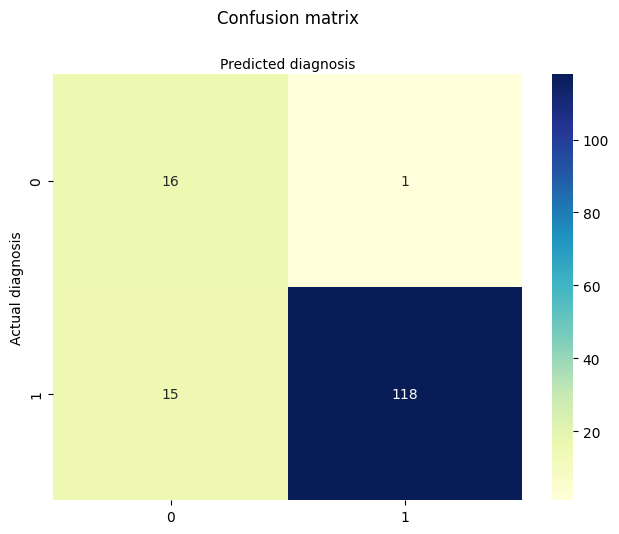

In [126]:
confusion_matrix(y_valid, y_pred)